In [1]:
%%capture output
!pip install pyvis.network

In [1]:
import pandas as pd
from pyvis.network import Network # Visualización de los grafos

import random
import matplotlib.pyplot as plt # Para seleccionar colores aleatorios (necesito nº comunidades a pintar)

In [2]:
def get_random_colors(n_communities):
    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)])]
    return colors

In [3]:
hetch_nodes = pd.read_csv('../data/Prado_users_clusters_OnePolarity.csv')
hetch_nodes.head()

,userId,age,gender,country,cluster,medoid
0,1,55-64,male,Spain,2,-1.0
1,2,25-34,female,Spain,0,-1.0
2,3,18-24,female,Spain,4,-1.0
3,4,18-24,female,Spain,1,-1.0
4,5,35-44,male,Spain,1,-1.0


In [4]:
hetch_nodes.values[1][4]

0

In [5]:
len(hetch_nodes['cluster'].unique())

5

In [6]:
colors =  [get_random_colors(len(hetch_nodes['cluster'].unique())) for i in range(5)]
colors = ["red","green","blue","black","orange"]
colors

['red', 'green', 'blue', 'black', 'orange']

In [7]:
similUsers = pd.read_csv('../data/Prado_users_similarity_OnePolarity.csv',index_col=0)
similUsers

,1,2,3,4,5,6,7,8,9,10,...,270,275,277,288,289,298,299,300,301,306
1,1.000000,0.398389,0.595236,0.590202,0.788626,0.569726,0.540071,0.439293,0.783930,0.473626,...,0.161579,0.640189,0.498389,0.558526,0.501126,0.573263,0.676863,0.459789,0.596463,0.553400
2,0.398389,1.000000,0.526213,0.514363,0.412863,0.627863,0.510102,0.377463,0.394526,0.347263,...,0.494989,0.500000,0.900000,0.581663,0.481663,0.563326,0.463326,0.831200,0.694526,0.844989
3,0.595236,0.526213,1.000000,0.766617,0.617202,0.693795,0.594230,0.517012,0.614063,0.450336,...,0.336126,0.472577,0.426213,0.554240,0.434098,0.392023,0.435904,0.614913,0.478239,0.371202
4,0.590202,0.514363,0.766617,1.000000,0.639414,0.645293,0.619016,0.558201,0.632839,0.472676,...,0.341826,0.504913,0.414363,0.586576,0.403076,0.359989,0.468239,0.650163,0.513489,0.359352
5,0.788626,0.412863,0.617202,0.639414,1.000000,0.566371,0.498831,0.432733,0.861530,0.554600,...,0.193152,0.599513,0.512863,0.517850,0.534800,0.581663,0.599513,0.581663,0.681663,0.494526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.573263,0.563326,0.392023,0.359989,0.581663,0.381663,0.372926,0.253963,0.600000,0.353263,...,0.574816,0.663326,0.663326,0.581663,0.681663,1.000000,0.700000,0.563326,0.700000,0.681663
299,0.676863,0.463326,0.435904,0.468239,0.599513,0.564663,0.433460,0.350063,0.594267,0.381463,...,0.358316,0.963326,0.563326,0.881663,0.814663,0.700000,1.000000,0.463326,0.600000,0.581663
300,0.459789,0.831200,0.614913,0.650163,0.581663,0.679063,0.503202,0.403730,0.563326,0.347263,...,0.494989,0.500000,0.731200,0.581663,0.481663,0.563326,0.463326,1.000000,0.863326,0.676189
301,0.596463,0.694526,0.478239,0.513489,0.681663,0.579063,0.439876,0.303730,0.700000,0.447263,...,0.358316,0.563326,0.794526,0.481663,0.581663,0.700000,0.600000,0.863326,1.000000,0.812863


In [8]:
similUsers.loc[1][2]

0.5952357534628379

In [9]:
net = Network(notebook = True)

for u in range(len(hetch_nodes.userId)):
    net.add_node(n_id = similUsers.columns[u], title="I am from cluster "+str(hetch_nodes.values[u][4]), label=hetch_nodes.values[u][0],color = colors[hetch_nodes.values[u][4]])
    # print(colors[hetch_nodes.values[u][4]])
    # net.add_node(u, title="I am from cluster"+str(hetch_nodes.values[u][4]), label=hetch_nodes.values[u][0],color ='#00ff1e')


for u in range(len(hetch_nodes.userId)):
    for k in range(len(hetch_nodes.userId)):
        net.add_edge(similUsers.columns[u],similUsers.columns[k],value = similUsers.iloc[u][k],hidden=True)
        

In [11]:
net.nodes[0]

{'title': 'I am from cluster 2',
 'color': 'blue',
 'id': '1',
 'label': 1,
 'shape': 'dot'}

In [98]:
# net.get_network_data()

In [101]:
net.show_buttons()#(filter_=['physics'])
net.show('nodes.html')

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
G = nx.Graph()

In [4]:
nodes = [
    (1, {"userId": 'N4536', "community": 1}),
    (2, {"userId": 'N4567', "community": 2})
]

In [5]:
G.add_nodes_from(nodes)

In [11]:
edges = [(1, 2, {'similarity': '0.78'})]

In [12]:
G.add_edges_from(edges)

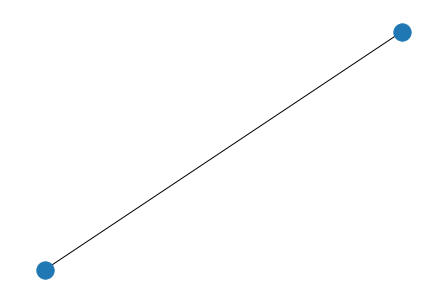

In [14]:
nx.draw(G)

In [17]:
G = nx.path_graph(4)
pos = nx.spring_layout(G)

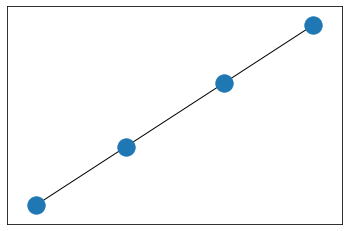

In [21]:
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
plt.show()